In [77]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [78]:
def drawGeo(Z,r, ax, Acolor):
    circle = plt.Circle((0,-Z),r,color = Acolor )
    #fig, ax = plt.subplots(figsize = (10,5))
    ax.set_xlim((-10,10)) 
    ax.set_ylim((-10,0))
    ax.add_artist(circle)
    return;

In [79]:
def Gravitydraw(Z,r,roh_1,roh_2, ax, Acolor):
    x = np.arange(-10.0, 10.0, 0.01)
    G = 6.67384**-11
    m = (roh_1 - roh_2)*2*math.pi*r**2
    g = 2*Z*G*m/(x**2+Z**2)
    #fig, ax = plt.subplots(figsize = (10,5))
    ax.plot(x,g, color = Acolor)
    return g;

In [86]:
class ugobject: #under ground round object
    def __init__(self,Z,r,roh_1,roh_2, f, axs, color = None):
        self.Z = Z  #depth
        self.r = r  #radius
        self.roh1 = roh_1
        self.roh2 = roh_2
        self.gravity = []
        if color == None:
            self.color = "r"
        else:
            self.color = color
        
    def calculate(self):
#         f , axs = plt.subplots(2 , sharex = True, figsize = (10,10))
#         f.subplots_adjust(hspace=0)
        #axs[0] = drawGeo(self.Z, self.r)
        #axs[1] = Gravitydraw(self.Z, self.r, self.roh1, self.roh2)

        drawGeo(self.Z, self.r, axs[0], self.color)
        self.gravity = Gravitydraw(self.Z, self.r, self.roh1, self.roh2, axs[1], self.color)
        plt.draw()
        


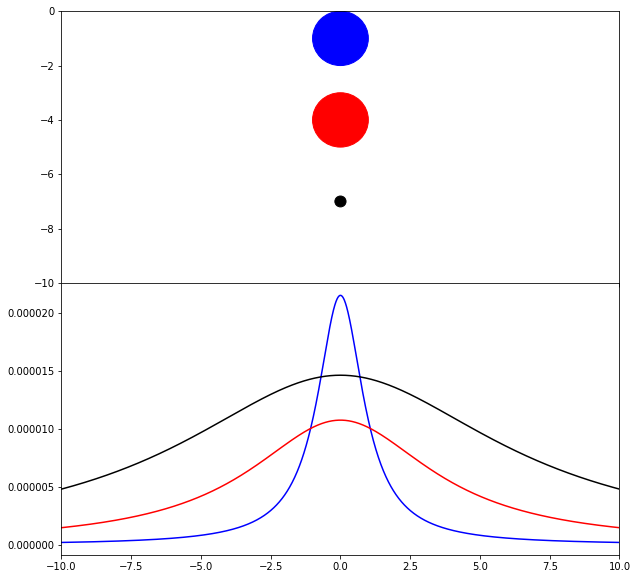

In [137]:
f , axs = plt.subplots(2 , sharex = True, figsize = (10,10))
f.subplots_adjust(hspace=0)

obj0 =ugobject(1,1,4000,2000,f,axs, "b")
obj0.calculate()

obj1 = ugobject(4,1,6000,2000,f,axs, "r")
obj1.calculate()

obj2 = ugobject(7,0.2,240000,2000,f,axs, "k")
obj2.calculate()



In [135]:
cost = math.sqrt((sum(obj1.gravity - obj2.gravity))**2)
cost

for cost < 0.0001:
    for 




0.011882112387618098

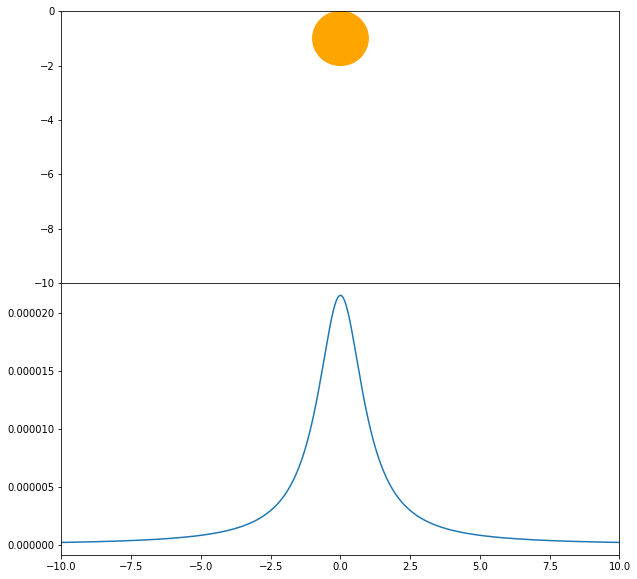

In [52]:
obj1 = ugobject(1,1,4000,2000)
obj1.calculate()

#### Jacobian

In [15]:
# %%time
import tensorflow as tf

with tf.Session() as sess:
    
    G = tf.constant(6.67384**-11)
    r = tf.Variable(1.)
    roh_1 = tf.Variable(3000.)
    roh_2 = tf.Variable(1000.)
    Z = tf.Variable(1.)
    tfpi = tf.constant(math.pi)
    m = (roh_1 - roh_2)*2*tfpi*r**2
    X = np.arange(-10.0, 10.0, 0.1, dtype = np.float32)
    

    init_op = tf.global_variables_initializer()# VERY IMPORTANT: Initialize the variables

    sess.run(init_op)

#    print(sess.run(g))

# calculate jacobian matrix for all x at (z = 1, r = 1, p1 = 3000, p2 = 1000)

#     for x in X[:10]:
#         g = 2*Z*G*m/(x**2+Z**2)
#         grad = sess.run(tf.gradients(g, [Z, r, roh_1, roh_2])) # calculate first order partial derivative wrt to every variable for all x
#         print("Jacobian Matrix at x =",x,"is", grad)
  
      

Jacobian Matrix at x = -10.0 is [2.0849642e-07, 4.2541694e-07, 1.0635424e-10, -1.0635424e-10]
Jacobian Matrix at x = -9.9 is [2.1260064e-07, 4.3396741e-07, 1.08491854e-10, -1.08491854e-10]
Jacobian Matrix at x = -9.799999 is [2.1682587e-07, 4.4277738e-07, 1.1069434e-10, -1.1069434e-10]
Jacobian Matrix at x = -9.699999 is [2.211768e-07, 4.518574e-07, 1.12964346e-10, -1.12964346e-10]
Jacobian Matrix at x = -9.599998 is [2.2565848e-07, 4.612186e-07, 1.15304655e-10, -1.15304655e-10]
Jacobian Matrix at x = -9.499998 is [2.302761e-07, 4.708727e-07, 1.1771817e-10, -1.1771817e-10]
Jacobian Matrix at x = -9.399998 is [2.3503507e-07, 4.808319e-07, 1.2020797e-10, -1.2020797e-10]
Jacobian Matrix at x = -9.299997 is [2.3994124e-07, 4.9110906e-07, 1.2277727e-10, -1.2277727e-10]
Jacobian Matrix at x = -9.199997 is [2.4500062e-07, 5.0171815e-07, 1.2542953e-10, -1.2542953e-10]
Jacobian Matrix at x = -9.099997 is [2.5021953e-07, 5.1267324e-07, 1.2816831e-10, -1.2816831e-10]


### Determine gradient for entire cost

(FW)

In [16]:
# analytical model:

g = 2*Z*G*m/(x**2+Z**2)

#### calculate synthetic data

First step: create synthetic data set (beware: "zero-order inverse crime"):


In [20]:
X_obs = X[::20]

In [29]:

with tf.Session() as sess:
    
    G = tf.constant(6.67384**-11)
    r = tf.Variable(1.)
    roh_1 = tf.Variable(3000.)
    roh_2 = tf.Variable(1000.)
    Z = tf.Variable(1.)
    tfpi = tf.constant(math.pi)
    m = (roh_1 - roh_2)*2*tfpi*r**2
    X = np.arange(-10.0, 10.0, .5, dtype = np.float32)
    
    g = 2*Z*G*m/(X**2+Z**2)

    init_op = tf.global_variables_initializer()# VERY IMPORTANT: Initialize the variables

    sess.run(init_op)
    
    val = sess.run(g)
    


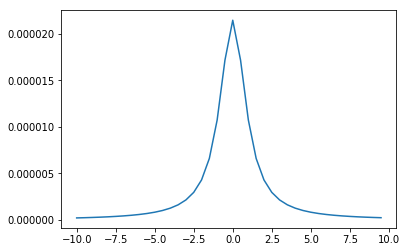

In [30]:
plt.plot(X, val)

#### Determine cost wrt synthetic data set

In [31]:
g_obs = val

In [41]:
import tensorflow.math as tfm

In [46]:



with tf.Session() as sess:
    
    G = tf.constant(6.67384**-11)
    r = tf.Variable(1.)
    roh_1 = tf.Variable(3000.)
    roh_2 = tf.Variable(1000.)
    Z = tf.Variable(1.)
    tfpi = tf.constant(math.pi)
    m = (roh_1 - roh_2)*2*tfpi*r**2
    X = np.arange(-10.0, 10.0, .5, dtype = np.float32)
    
    g = 2*Z*G*m/(X**2+Z**2)
    
    cost = tfm.reduce_sum(tf.pow((g_obs - g), 2))

    init_op = tf.global_variables_initializer()# VERY IMPORTANT: Initialize the variables

    sess.run(init_op)
    
    c = sess.run(cost)

In [45]:
c

3.6237693e-10

#### Calculate Jacobian wrt cost function

In [65]:



with tf.Session() as sess:
    
    G = tf.constant(1.) # 6.67384**-11)
    # G = tf.constant(6.67384**-11)
    r = tf.Variable(1.)
    rho_1 = tf.Variable(3000.)
    rho_2 = tf.Variable(1000.)
    Z = tf.Variable(1.)
    tfpi = tf.constant(math.pi)
    m = (rho_1 - rho_2)*2*tfpi*r**2
    X = np.arange(-10.0, 10.0, .5, dtype = np.float32)
    
    g = 2*Z*G*m/(X**2+Z**2)
    
    cost = tfm.reduce_sum(tf.pow((g_obs - g), 2))

    init_op = tf.global_variables_initializer()# VERY IMPORTANT: Initialize the variables

    sess.run(init_op)
    
    J_c = sess.run(tf.gradients(cost, [rho_1, rho_2, Z, r]))

In [66]:
print(J_c)

[1983755.4, -1983755.4, -1988424400.0, 7935021600.0]


### simple gradient descent example

Following example from github page (https://gist.github.com/DominicBreuker/c1082d02456c4186c1a5f77e12972b85)

In [81]:
# G = tf.constant(1.) # 6.67384**-11)
G = tf.constant(6.67384**-11)
r = tf.Variable(1.)
rho_1 = tf.Variable(2000.)
rho_2 = tf.Variable(1000.)
Z = tf.Variable(1.)
tfpi = tf.constant(math.pi)
m = (rho_1 - rho_2)*2*tfpi*r**2
X = np.arange(-10.0, 10.0, .5, dtype = np.float32)

g = 2*Z*G*m/(X**2+Z**2)

cost = tfm.reduce_sum(tf.pow((g_obs - g), 2))

# FW: I guess the problem is in the definition of the step size?
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(cost)


def optimize():
    with tf.Session() as sess:

        init_op = tf.global_variables_initializer()# VERY IMPORTANT: Initialize the variables

        sess.run(init_op)

        # print("starting at", "x:", session.run(x), "log(x)^2:", session.run(log_x_squared))
        for step in range(10):  
            sess.run(train)
            # print("step", step, "x:", session.run(x), "log(x)^2:", session.run(log_x_squared))
        
            print(sess.run(cost))

optimize()


3.6237707e-10
3.6237707e-10
3.6237707e-10
3.6237707e-10
3.6237707e-10
3.6237707e-10
3.6237707e-10
3.6237707e-10
3.6237707e-10
3.6237707e-10


## Hessian

#### Hessian simple test 


Because tf.hessian only gives the diagnal elements of the Hessian matrix, here is a simple sulotion to calculate the full Hessian. However, only works for vars are single floats.
https://stackoverflow.com/questions/35266370/tensorflow-compute-hessian-matrix-and-higher-order-derivatives

In [11]:
def cons(x):
    return tf.constant(x, dtype=tf.float32)

x = tf.Variable(np.random.random_sample(), dtype=tf.float32)
y = tf.Variable(np.random.random_sample(), dtype=tf.float32)

f = tf.pow(x, cons(2)) + cons(2) * x * y + cons(3) * tf.pow(y, cons(2)) + cons(4) * x + cons(5) * y + cons(6)

def compute_hessian(fn, vars):
    mat = []
    for v1 in vars:
        temp = []
        for v2 in vars:
            # computing derivative twice, first w.r.t v2 and then w.r.t v1
            temp.append(tf.gradients(tf.gradients(fn, v2)[0], v1)[0])
        temp = [cons(0) if t == None else t for t in temp] # tensorflow returns None when there is no gradient, so we replace None with 0
        temp = tf.stack(temp)
        mat.append(temp)
    mat = tf.stack(mat)
    return mat

hessian = compute_hessian(f, [x, y])

sess = tf.Session()
sess.run(tf.initialize_all_variables())
print (sess.run(hessian))

W0621 13:43:43.369928 140124014614336 deprecation.py:323] From /home/george/.local/lib/python3.6/site-packages/tensorflow/python/util/tf_should_use.py:193: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


[[2. 2.]
 [2. 6.]]


In [12]:
import numpy as np
import tensorflow as tf

def HessianGrav(r, roh1, roh2, z, x):
    def cons(x):
        return tf.constant(x, dtype=tf.float32)

    G = tf.constant(6.67384**-11)
    r = tf.Variable(np.float32(r))
    roh_1 = tf.Variable(np.float32(roh1))
    roh_2 = tf.Variable(np.float32(roh2))
    Z = tf.Variable(np.float32(z))
    tfpi = tf.constant(math.pi)
    m = (roh_1 - roh_2)*2*tfpi*r**2
    X = tf.constant(np.float32(x))

    g = 2*Z*G*m/(X**2+Z**2)


    def compute_hessian(fn, vars):
        mat = []
        for v1 in vars:
            temp = []
            for v2 in vars:
                # computing derivative twice, first w.r.t v2 and then w.r.t v1
                temp.append(tf.gradients(tf.gradients(fn, v2)[0], v1)[0])
            temp = [cons(0) if t == None else t for t in temp] # tensorflow returns None when there is no gradient, so we replace None with 0
            temp = tf.stack(temp)
            mat.append(temp)
        mat = tf.stack(mat)
        return mat


    sess = tf.Session()
    sess.run(tf.initialize_all_variables())


    x_list =[Z, r, roh_1, roh_2]

    hessian = compute_hessian(g, x_list)

    print(sess.run(hessian))
    return(hessian)

In [13]:
HessianGrav(1, 3000, 1000, 1, 0) # Hessian matrix of gravity at r = 1, p1= 3000, p2 = 1000, Z = 1, x = 0

[[ 4.2967105e-05 -4.2967113e-05 -1.0741778e-08  1.0741778e-08]
 [-4.2967113e-05  4.2967113e-05  2.1483556e-08 -2.1483556e-08]
 [-1.0741778e-08  2.1483556e-08  0.0000000e+00  0.0000000e+00]
 [ 1.0741778e-08 -2.1483556e-08  0.0000000e+00  0.0000000e+00]]


<tf.Tensor 'stack_7:0' shape=(4, 4) dtype=float32>

### Probabilistic problem


Stuck here, to be continue....